### kNN原理
存在样本数据集合(训练样本集)，每条数据存在标签。
输入无标签的新数据后，将新数据的每个特征与样本集中数据对应特征进行比较，然后算法提取样本集中特征最相思数据的分类标签。
一般我们选择数据集中k个最相似的数据，即k-近似算法中k的出处，一般k不大于20。最后选择k个相似数据中出现最多的分类，作为新数据的分类。

In [9]:
from numpy import *
import operator

def createDataSet():
    group=array([[1.0,1.1],[1.0,1.0],[0,0],[0,0.1]])
    lables=['A','A','B','B']
    return group,lables

#测试输出
group,labels=createDataSet()
group

array([[1. , 1.1],
       [1. , 1. ],
       [0. , 0. ],
       [0. , 0.1]])

**以下函数即为利用欧式距离的计算公式获取k个距离最小的k点，进行排序，最后输出标签**

In [23]:
def classify(inX,dataSet,labels,k):#输入向量inX，训练集dataSet，向量标签labels，以及k
    
    #计算距离
    dataSetSize=dataSet.shape[0] #shape[0]读取矩阵第一维度的长度 如3x3的矩阵第一维度长度就为3
    diffMat=tile(inX,(dataSetSize,1))-dataSet #tile函数属于numpy模块，起重复各个维度的作用，用于把inx作为元素填充到dataSetSizex1大小的矩阵中
    sqDiffMat=diffMat**2
    sqDistances=sqDiffMat.sum(axis=1)#加入axis=1表示对一个矩阵的每一行向量相加
    distances=sqDistances**0.5
    #print(distances)
    
    sortedDistIndicies=distances.argsort()#获取distance向量从小到大排后的索引 去除print代码注释查看效果
    #print(sortedDistIndicies)
    
    #采用classCount存放前k个量的统计个数
    classCount={}
    for i in range(k):
        voteIlabel=labels[sortedDistIndicies[i]]
        classCount[voteIlabel]=classCount.get(voteIlabel,0)+1
    print(classCount)
    #对统计的前k个量进行排序操作
    sortedClassCount=sorted(classCount.items(),key=operator.itemgetter(1),reverse=True)#将字典分为元组，按照第二个元素的顺序对字典进行排序，为逆序
    
    return sortedClassCount[0][0]

#测试分类
classify([0,0],group,labels,3)

{'B': 2, 'A': 1}


'B'

**关于矩阵`sum`函数中`axis`变量的测试**

In [7]:

a = array([[0, 2, 1]])#调用numpy的array

print(a.sum())
print(a.sum(axis=0))
print(a.sum(axis=1))

#以下操作会报错，由于b为一维向量，不存在行
#b = np.array([0, 2, 1])
#print b.sum()
#print b.sum(axis=0)
#print b.sum(axis=1)

3
[0 2 1]
[3]


### 使用kNN算法改进约会网站的配对效果
输入文件为datingTestSet.txt包括三列数据信息:飞行里程数+玩视频游戏时间占比+每周消费冰激凌公斤数  包括一列标签：喜欢程度(有三个等级)

In [13]:
#将原始数据转化为矩阵以及对应标签
import numpy as np
def file2matrix(filename):
    fr = open(filename)
    numberOfLines = len(fr.readlines())#获取文本行数
    returnMat = np.zeros((numberOfLines,3))#创建行数x3阶矩阵
    classLabelVector = []
    fr = open(filename)
    index = 0
    for line in fr.readlines():
        line = line.strip()
        listFromLine = line.split('\t')
        returnMat[index,:] = listFromLine[0:3]
        #classLabelVector.append(int(listFromLine[-1])) #将最后一列的信息作为标签 但要求为整形 但由于存在三个等级 我们便可以根据三个等级以数字代替
        if listFromLine[-1] == 'didntLike':
            classLabelVector.append(1)
        elif listFromLine[-1]=='smallDoses':
            classLabelVector.append(2)
        elif listFromLine[-1]=='largeDoses':
            classLabelVector.append(3)
        index += 1
    return returnMat,classLabelVector
datingDataMat,datingLabels=file2matrix('datingTestSet.txt')
datingLabels[0:20]#测试代码 

[3, 2, 1, 1, 1, 1, 3, 3, 1, 3, 1, 1, 2, 1, 1, 1, 1, 1, 2, 3]

**通过matplotlib实现将数据的可视化，可以为各种颜色的点添加标注信息 代码参考github**

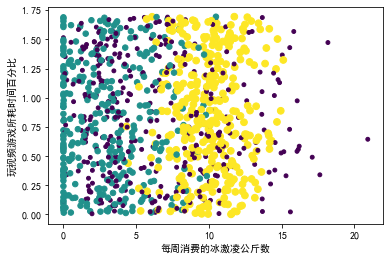

In [64]:
import matplotlib
import matplotlib.pyplot as plt
fig=plt.figure()
ax=fig.add_subplot(111)#画子图 111即为1,1,1共一行一列的第一个图 即为只有一个图
ax.scatter(datingDataMat[:,1],datingDataMat[:,2],15.0*array(datingLabels),15.0*array(datingLabels))#参数坐标x 坐标y 点大小 点颜色
#实现图中支持中文
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus']=False
plt.xlabel('每周消费的冰激凌公斤数')
plt.ylabel('玩视频游戏所耗时间百分比')
plt.show()

**由于各项数据的量纲不同 即每年的飞机里程数远大于另外两个值 所以需要对其进行数值归一化处理 使得数据处于0到1之间或者-1到1**

In [66]:
def autoNorm(dataSet):
    #从列中获取最小最大值
    minVals = dataSet.min(0)
    maxVals = dataSet.max(0)
    
    ranges = maxVals - minVals
    normDataSet = zeros(shape(dataSet))
    m = dataSet.shape[0]
    normDataSet = dataSet - tile(minVals, (m,1))
    normDataSet = normDataSet/tile(ranges, (m,1))   #element wise divide
    
    return normDataSet, ranges, minVals
normalMat,ranges,minVals=autoNorm(datingDataMat)
minVals

array([0.      , 0.      , 0.001156])

**分类器的测试代码**

In [80]:
import Ipynb_importer
from kNN import classify
def datingClassTest():
    hoRatio = 0.50      #hold out 10%
    datingDataMat,datingLabels = file2matrix('datingTestSet.txt')       #load data setfrom file
    normMat, ranges, minVals = autoNorm(datingDataMat)
    m = normMat.shape[0]
    numTestVecs = int(m*hoRatio)
    errorCount = 0.0
    for i in range(numTestVecs):
        classifierResult = classify(normMat[i,:],normMat[numTestVecs:m,:],datingLabels[numTestVecs:m],3)
        print("the classifier came back with: %d, the real answer is: %d" % (classifierResult, datingLabels[i]))
        if (classifierResult != datingLabels[i]): errorCount += 1.0
    print("the total error rate is: %f" % (errorCount/float(numTestVecs)))
    print(errorCount)
datingClassTest()

{3: 3}
the classifier came back with: 3, the real answer is: 3
{2: 2, 3: 1}
the classifier came back with: 2, the real answer is: 2
{1: 2, 2: 1}
the classifier came back with: 1, the real answer is: 1
{1: 3}
the classifier came back with: 1, the real answer is: 1
{1: 3}
the classifier came back with: 1, the real answer is: 1
{1: 3}
the classifier came back with: 1, the real answer is: 1
{3: 3}
the classifier came back with: 3, the real answer is: 3
{3: 3}
the classifier came back with: 3, the real answer is: 3
{1: 3}
the classifier came back with: 1, the real answer is: 1
{3: 3}
the classifier came back with: 3, the real answer is: 3
{1: 3}
the classifier came back with: 1, the real answer is: 1
{1: 3}
the classifier came back with: 1, the real answer is: 1
{2: 3}
the classifier came back with: 2, the real answer is: 2
{1: 3}
the classifier came back with: 1, the real answer is: 1
{1: 3}
the classifier came back with: 1, the real answer is: 1
{1: 3}
the classifier came back with: 1, th

**约会网站预测函数**

In [85]:
import Ipynb_importer
from kNN import classify
def classifyPerson():
    resultList = ['dislike', 'smalldoses', 'largedoses']
    percentTats = float(input('玩视频游戏所耗时间百分比：'))
    ffMiles = float(input('每年获得的飞行常客里程数：'))
    iceCream = float(input('每周消费的冰淇淋公升数：'))

    filename = 'datingTestSet.txt'
    datingDataMat, datingLabels = file2matrix(filename)
    normMat, ranges, minVals = autoNorm(datingDataMat)

    inArr = np.array([ffMiles, percentTats, iceCream])
    classifierResult = classify((inArr - minVals) / ranges, normMat, datingLabels, 4)
    print('你可能%s这个人' % (resultList[classifierResult - 1]))
    
    
classifyPerson()

玩视频游戏所耗时间百分比：1
每年获得的飞行常客里程数：1
每周消费的冰淇淋公升数：1
{2: 4}
你可能smalldoses这个人


### 手写识别系统
上述是数值型数据，但有时候会有图像等难以描述的数据。为了编写一个识别数字的系统，我们可以将32x32的像素点矩阵转化为1x1024的向量，采用分类器对其进行分类。

### 总结
k-近邻分类算法(k-nearest neighbor classification)通过给定数据以及标签进行计算。
具体步骤为
* 读取信息
* 将信息作归一化处理
* 构造分类器
* 测试分类器

该算法做的就是一个线性的比较。在运行过程中，它需要保存所有数据集，需要庞大的内存开销。同时对所有数据集的每个数据进行距离计算，如果数据的维度比较大，则需要很多的时间成本。